# Исследование оттока клиентов банка «Метанпром»

**Задача:**

Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

- Провести исследовательский анализ данных,
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы.
    
    *Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Проверить гипотезу различия кредитного рейтинга между теми клиентами, которые ушли и теми, которые остались.*
    
    
**Описание датасета**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Столбцы:

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — оценка собственности,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — заработная плата клиента,
- `churn` — ушёл или нет.

## Презентация:

<https://drive.google.com/file/d/1oicmuVghT1ioHwfNvZZ7lhSt8tt470hG/view?usp=sharing>

## Дашборд:

<https://public.tableau.com/views/Salarydistofbanksclients/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link>

## Импорт библиотек и выгрузка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# сохраняем ссылку на данные в переменную
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"

# сохраняем данные в переменную
data = pd.read_csv(path)


# выводим данные для ознакомления
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [3]:
# выводим общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


Данные выгружены, необходимые библиотеки импортированы.

Видим, что есть проблемы с данными, переходим к предобработке.

## Предобработка данных

### корректность наименований колонок:

In [4]:
# проверяем корректность наименований столбцов
data.columns

Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

Видим, что наименования столбцов имеют неудобный вид:
* не приведены к snake_case;
* начинаются с заглавных букв.

In [5]:
# приводим наименования столбцов к нижнему регистру
data.columns = data.columns.str.lower()

#применяем snake_case
data = data.rename(columns={'userid' : 'user_id'})

#производим проверку
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Наименования столбцов приведены к удобному виду.

### наличие и обработка пропусков:

In [6]:
# проверяем наличие пропусков в данных
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Видим, что есть 2.295 (это 22.95% от общего числа данных) пропусков в колонке `balance`. Заполнить их на данный момент мы не можем, так как эти данные носят личный характер. Попробуем ниже найти какие-либо взаимосвязи и посмотрим получится ли заполнить эти пропуски.

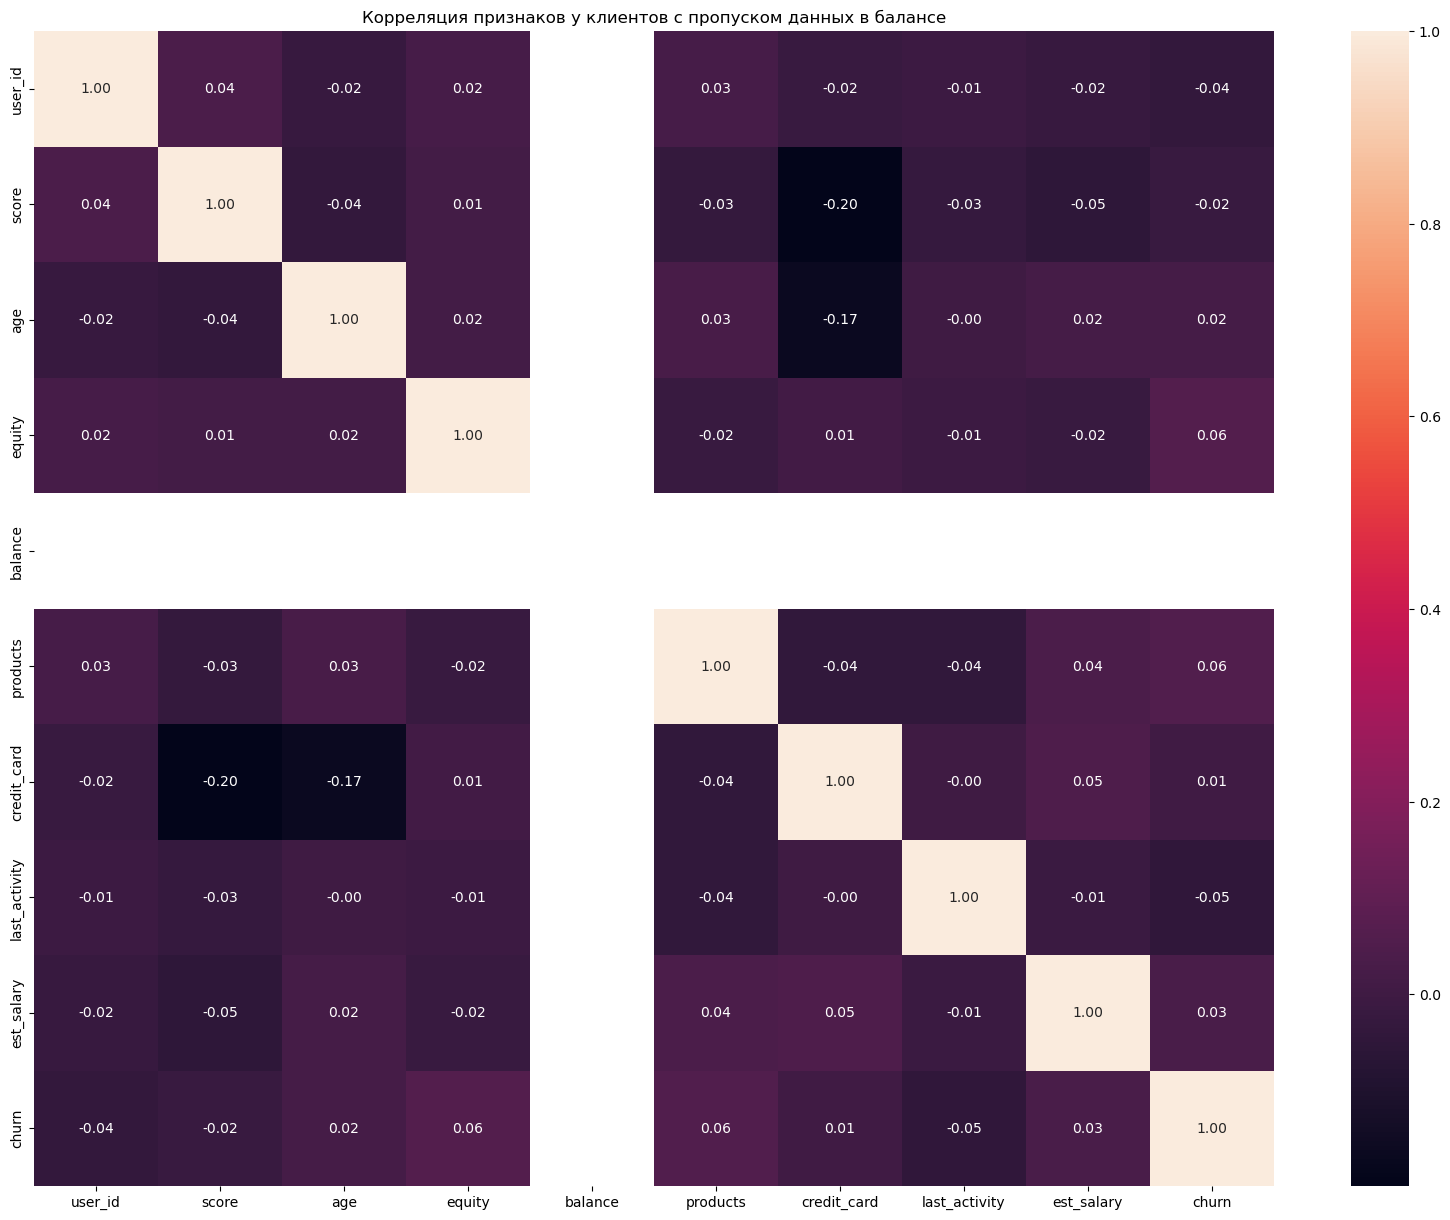

In [7]:
# строим хит-мэп по матрице корреляций
corr = data[data['balance'].isna() == True].corr()

plt.figure(figsize=(20, 15))

sns.heatmap(corr, annot = True, fmt = '0.2f');

plt.title('Корреляция признаков у клиентов с пропуском данных в балансе');

По графику видим, что нет ни одной сильной зависимости. Корреляция с другими данными очень низкая, а это значит, что достоверно заполнить пропуски у нас не выйдет, а значит оставим их без изменений.

### наличие и обработка дубликатов:

In [8]:
# проверим наличие явных дубликатов
print('Количество дубликатов в данных равно:', data.duplicated().sum())

Количество дубликатов в данных равно: 1


Видим, что в данных есть один явный дубликат. Избавимся от него.

In [9]:
# избавляемся от дубликата
data = data.drop_duplicates().reset_index(drop=True)

In [10]:
# проверим неявные дубликаты в названиях городов
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [11]:
# проверим неявные дубликаты в разделителе полов
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

Проверили датасет на наличие явных дубликатов и правильность написания категориальных данных. Выявили 1 явный дубль в данных и удалили его.

### проверка соответствия типов данных:

In [12]:
# выводим общую информацию по данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int64  
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.5+ KB


Видим, что все типы соответствуют данным, никаких исправлений не требуется.

### наличие и обработка выбросов:

In [13]:
# смотрим распределение по каждому столбцу датафрейма
data.drop('user_id', axis=1).describe().style.format('{:.2f}')

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9999.00,9999.00,9999.00,7705.00,9999.00,9999.00,9999.00,9999.00,9999.00
mean,848.69,42.84,2.63,827794.31,1.87,0.68,0.52,147843.48,0.18
std,65.45,12.13,1.98,1980614.15,0.80,0.47,0.50,139375.83,0.39
min,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,802.00,34.00,0.00,295554.16,1.00,0.00,0.00,75251.78,0.00
50%,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119654.70,0.00
75%,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174499.66,0.00
max,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Видим, что средние и медианные значения в категориях близки - значит распределение на данном этапе около нормального.

#### определим функцию для построения боксплотов

In [14]:
# боксплот по столбцу
def data_box(column, title):
    fig = plt.figure(figsize=(10, 5))
    data.boxplot(column)
    plt.title(title)
    plt.ylabel('количество')
    plt.show()
    
# боксплот по столбцу с лимитом
def data_box_lim(column, title, min_lim, max_lim):
    fig = plt.figure(figsize=(10, 5))
    data.boxplot(column)
    plt.title(title)
    plt.ylabel('количество')
    plt.ylim(min_lim, max_lim)
    plt.show()

#### в баллах кредитного рейтинга

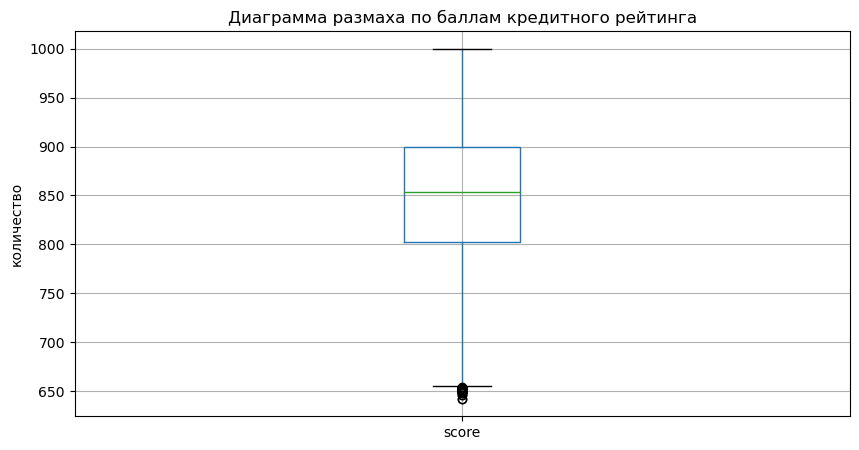

In [15]:
# строим диаграмму размаха по баллам кредитного рейтинга
data_box('score', 'Диаграмма размаха по баллам кредитного рейтинга')

Видим, что есть выбросы, проставим лимиты и посмотрим на значения ближе. Медианный рейтинг равен примерно 855, 5 персентиль - 655, 95 равен 1000.

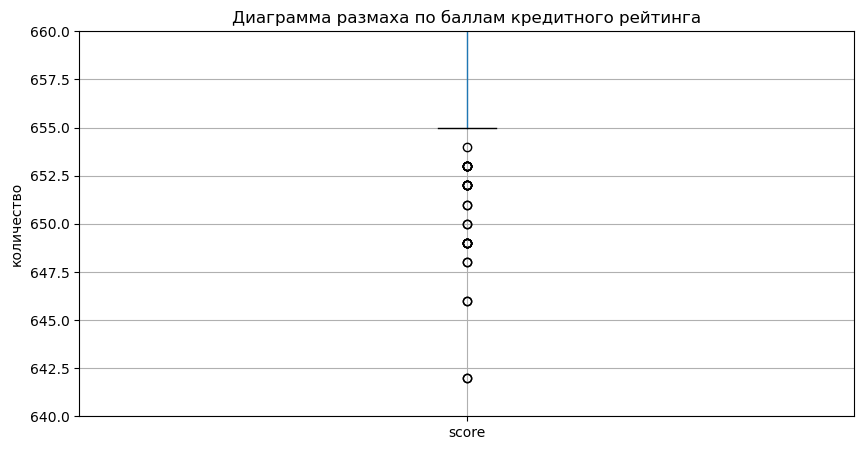

In [16]:
# строим диаграмму размаха по баллам кредитного рейтинга c лимитом
data_box_lim('score', 'Диаграмма размаха по баллам кредитного рейтинга', 640, 660)

Видим, что есть клиенты с очень низким кредитным рейтингом. Их не очень много, посмотрим на них в таблице.

In [17]:
# строим таблицу с клиентами с самыми низкими кредитными рейтингами
data[data['score'] < 655]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
263,210814,652.0,Ярославль,М,34,0,NaN,1,1,1,188786.49,0
265,157448,649.0,Рыбинск,М,37,0,NaN,1,1,1,81942.85,0
533,146648,649.0,Ярославль,М,33,0,NaN,1,1,1,149318.49,0
921,179302,646.0,Ярославль,М,37,0,NaN,1,1,1,148297.71,0
1291,181159,651.0,Ярославль,М,35,0,NaN,1,1,1,180550.90,0
1304,157084,653.0,Рыбинск,М,53,0,NaN,2,1,0,72345.06,0
2501,208801,650.0,Ярославль,М,56,0,NaN,1,1,0,119643.06,0
2532,151179,642.0,Рыбинск,М,69,0,NaN,1,1,1,35917.41,0
3008,156535,652.0,Рыбинск,М,55,0,NaN,2,1,1,60374.86,0
3168,173067,649.0,Ярославль,М,46,0,NaN,1,1,1,121654.31,0


Я не стану удалять эти данные, так как можно заметить, что клиенты, имеющие экстремально низкие рейтинги, все владеют кредитными картами и не покинули банк.

#### в возрасте

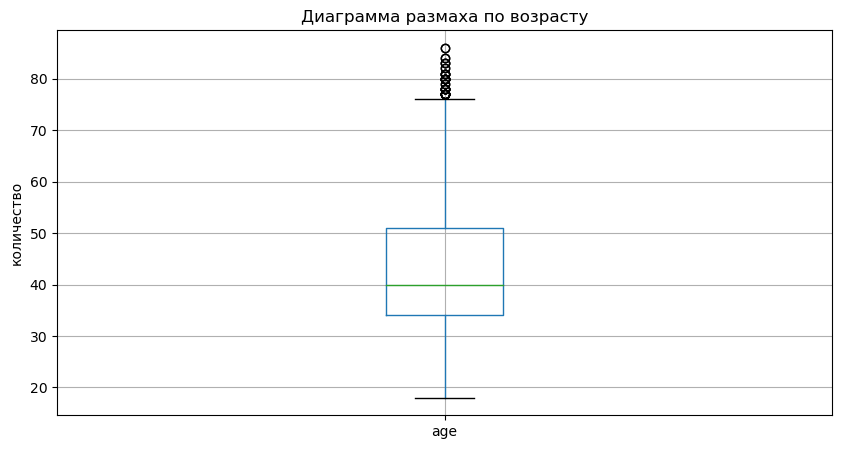

In [18]:
# строим диаграмму размаха по возрасту
data_box('age', 'Диаграмма размаха по возрасту')

Медианный возраст клиентов равен 40 годам, минимальный 18, максимальный больше 80. Расммотрим верхнюю часть ближе.

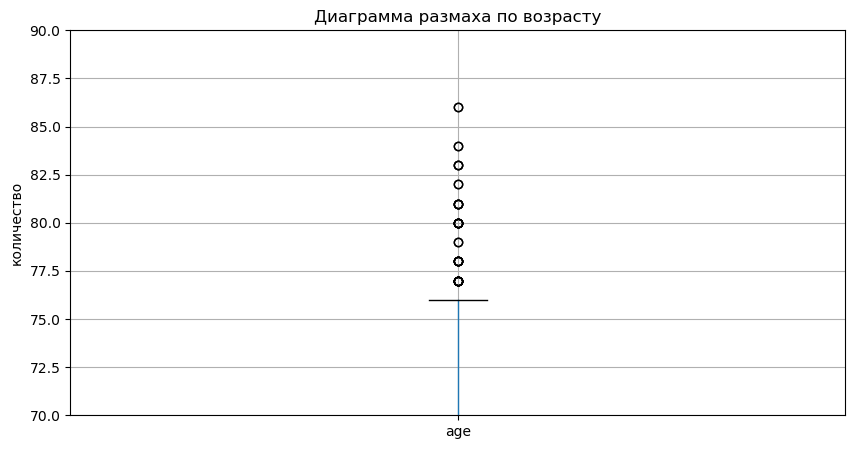

In [19]:
# строим диаграмму размаха по возрасту c лимитом
data_box_lim('age', 'Диаграмма размаха по возрасту', 70, 90)

Есть клиенты возрастом старше 76 лет, что выходит за нормы, посмотрим в таблице.

In [20]:
# строим таблицу с клиентами старше 76 лет
data[data['age'] > 76]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
219,161758,754.0,Ярославль,Ж,80,1,332616.82,3,0,1,114804.27,0
255,219624,906.0,Ростов,Ж,77,0,NaN,1,1,0,138937.87,0
396,205650,869.0,Ростов,Ж,80,4,570064.04,2,0,0,25503.20,0
414,129007,708.0,Рыбинск,Ж,78,0,NaN,1,1,1,342387.74,0
505,205035,725.0,Рыбинск,Ж,77,3,73.00,2,0,1,8729.84,0
540,188460,720.0,Ярославль,Ж,80,0,NaN,1,1,1,153804.84,0
1017,116085,832.0,Ярославль,Ж,81,1,363743.96,2,0,0,36681.22,0
1115,186415,917.0,Рыбинск,Ж,77,3,1787688.72,3,1,0,73650.19,0
1283,127231,796.0,Рыбинск,Ж,80,1,347590.32,2,1,0,27123.50,0
1621,151166,916.0,Рыбинск,Ж,83,0,NaN,1,1,1,55681.82,0


Ситуация очень интересная - все клиенты старше 76 лет являются женщинами. Эти выбросы тоже не буду удалять.

#### в балансе на счете

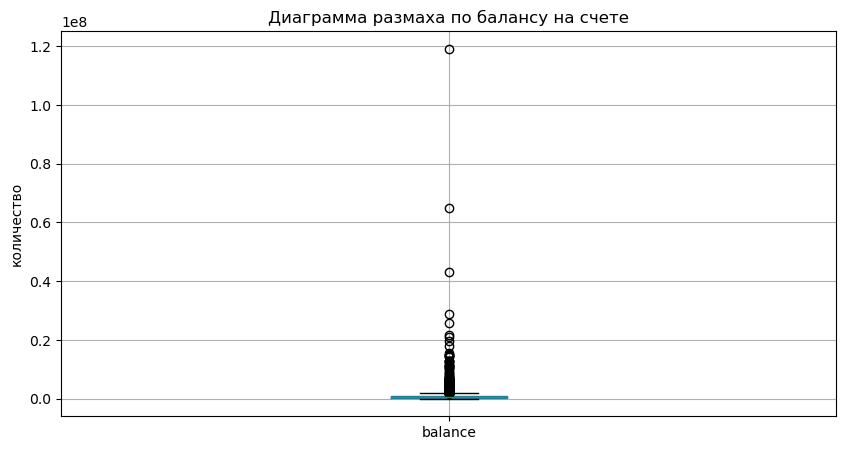

In [21]:
# строим диаграмму размаха по балансу
data_box('balance', 'Диаграмма размаха по балансу на счете')

Есть явные выбросы, настолько сильные, что даже не посмотреть распределение, поставим лимиты.

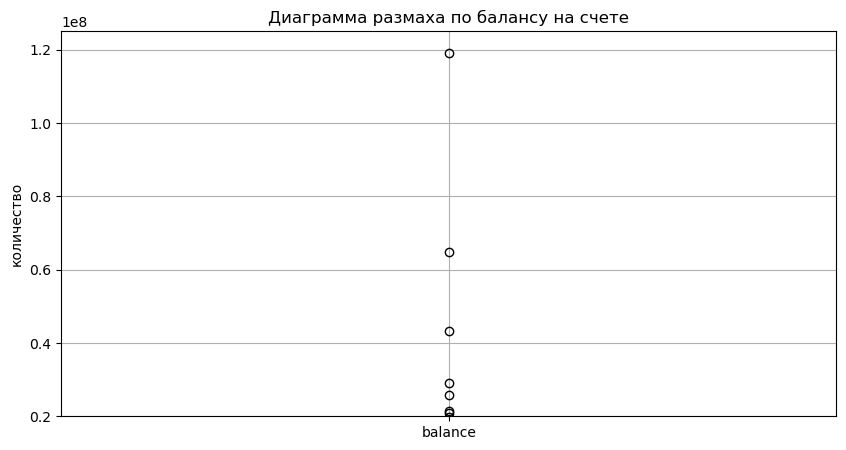

In [22]:
# строим диаграмму размаха по балансу с лимитами
data_box_lim('balance', 'Диаграмма размаха по балансу на счете', 20000000, 125000000)

Кто-то хранит на счете огромные суммы. Давайте посмотрим по таблице и решим, что делать.

In [23]:
# строим таблицу с клиентами, на счете которых лежит более 20 миллионов
data[data['balance'] > 20000000]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1059,114103,894.0,Ярославль,М,58,4,6.486621e+07,2,1,1,88861.60,1
1846,114088,927.0,Ярославль,М,57,5,4.327710e+07,3,0,1,82619.00,0
4721,228786,1000.0,Ярославль,М,45,5,2.900893e+07,2,0,1,811804.54,0
6948,137434,1000.0,Ярославль,М,37,4,2.090616e+07,2,1,1,947606.60,1
7597,156149,900.0,Ярославль,М,62,5,1.191136e+08,2,1,1,138041.31,0
8484,221720,1000.0,Ярославль,Ж,35,5,2.154994e+07,2,0,0,1051902.65,0
9752,122015,885.0,Ярославль,М,64,4,2.572776e+07,3,1,0,168746.90,0


Все самые богатые люди находятся в Ярославле.

##### в зарплате

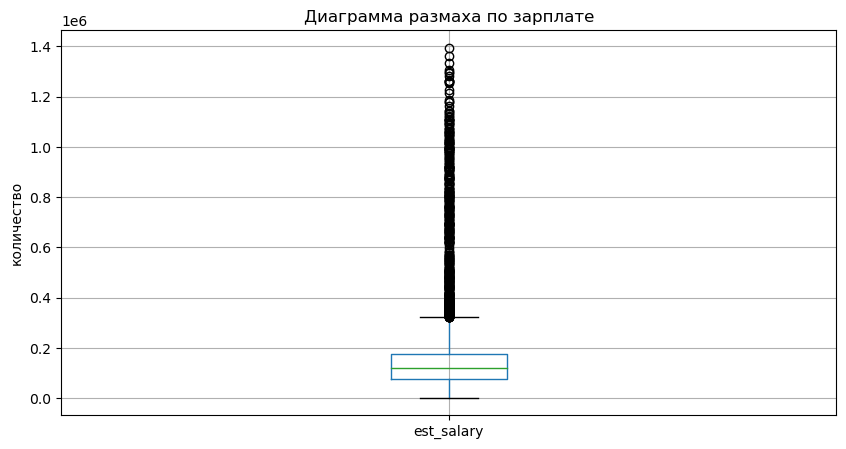

In [24]:
# строим диаграмму размаха по зарплате
data_box('est_salary', 'Диаграмма размаха по зарплате')

Видим большое количество выбросов по зарплате.

В нашем исследовании не будет проводиться огромное кол-во подсчетов, поэтому, по сути, на выбросы можно не обращать особого внимания. Каждое удаление выбросов приведет к уменьшению кол-ва данных для исследования, а это уже имеет огромное влияение на наше исследование, так как меньше данных - ниже точность, поэтому от большинства выбросов мы избавляться не стали.

### итог предобработки данных:

*проверили*

1. наименования колонок и привели их к удобному виду;
2. наличие пропусков и решили их не заполнять;
3. наличие явных дубликатов и повторов в категориях и все очистили;
4. соответствие типов данным, все соответствует;
5. выбросы и обработали их.

**Предобработка данных завершена, можем переходить к исследовательскому анализу.**

## Исследовательский анализ

### общее распределение по таблице:

In [25]:
# выводим распределения по столбцам, удалив столбец user_id
data.drop('user_id', axis=1).describe().style.format('{:.2f}')

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9999.00,9999.00,9999.00,7705.00,9999.00,9999.00,9999.00,9999.00,9999.00
mean,848.69,42.84,2.63,827794.31,1.87,0.68,0.52,147843.48,0.18
std,65.45,12.13,1.98,1980614.15,0.80,0.47,0.50,139375.83,0.39
min,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,802.00,34.00,0.00,295554.16,1.00,0.00,0.00,75251.78,0.00
50%,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119654.70,0.00
75%,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174499.66,0.00
max,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


По данной таблице мы можем запросто посмотреть минимумы, максимумы, среднее, медианы и персентили числовых значений, но какие-либо выводы сделать сложно, чтобы посмотреть распределение построим графики и соответствующие таблицы.

### категоризация данных:

В данном разделе выделим дополнительные категории для упрощения исследования.

In [26]:
# категории по кредитному рейтингу
def score_cat(score):
    if score <= 800:
        return 'оч.низкий'
    elif 801 <= score <= 839:
        return 'низкий'
    elif 840 <= score <= 881:
        return 'средний'
    elif score > 881:
        return 'высокий'
    
print('Количество клиентов в группах:')

data['score_cat'] = data['score'].apply(score_cat)
data['score_cat'].value_counts()

Количество клиентов в группах:


высокий      3586
оч.низкий    2441
средний      2043
низкий       1929
Name: score_cat, dtype: int64

In [27]:
# категории по возрасту
def age_cat(age):
    if age <= 35:
        return 'молодой'
    elif 36 <= age <= 55:
        return 'взрослый'
    elif age > 55:
        return 'пожилой'

print('Количество клиентов в группах:')    
    
data['age_cat'] = data['age'].apply(age_cat)
data['age_cat'].value_counts()

Количество клиентов в группах:


взрослый    4916
молодой     3267
пожилой     1816
Name: age_cat, dtype: int64

In [28]:
# категории по остатку на счете 
def balance_cat(balance):
    if balance <= 295000:
        return 'минимальный'
    elif 295000 < balance <= 524000:
        return 'средний'
    elif 524000 < balance <= 980000:
        return 'большой'
    elif balance > 980000:
        return 'миллионный'

print('Количество клиентов в группах:') 
    
data['balance_cat'] = data['balance'].apply(balance_cat)
data['balance_cat'].value_counts()

Количество клиентов в группах:


средний        1929
большой        1927
миллионный     1927
минимальный    1922
Name: balance_cat, dtype: int64

In [29]:
# категории по зарплате
def est_salary_cat(est_salary):
    if est_salary <= 75000:
        return 'средняя'
    elif 75000 < est_salary <= 119000:
        return 'средняя+'
    elif 119000 < est_salary <= 174000:
        return 'выше среднего'
    elif est_salary > 174000:
        return 'значительно выше среднего'
    
print('Количество клиентов в группах:') 

data['est_salary_cat'] = data['est_salary'].apply(est_salary_cat)
data['est_salary_cat'].value_counts()

Количество клиентов в группах:


значительно выше среднего    2521
выше среднего                2515
средняя                      2485
средняя+                     2478
Name: est_salary_cat, dtype: int64

### распределение в графиках c разделением на ушедших/оставшихся:

In [30]:
# функция, которая строит график распределения клиентов с учетом разделенеия
def churn_chart(column, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(x = data[column], hue='churn', data=data, order=data[column].value_counts().index)
    plt.title(title)
    plt.grid()
    plt.legend(["остался", "ушел"], loc ="upper right")
    plt.show()
    
# функция, которая строит таблицу с информацией о кол-ве клентов в категории и доле ушедших в этой категории
def churn_tabel(column):
    tabel = (data.groupby([column]).agg({'churn':'mean', 'user_id':'count'}).reset_index()
             .rename(mapper = {'churn':"доля ушедих", 'user_id':'кол-во клиентов'}, axis=1)
             .set_index(column)
             .sort_values(by='доля ушедих', ascending=False)
             .style.format('{:.2f}')
             )
    return tabel

#### по кредитному рейтингу

,доля ушедих,кол-во клиентов
score_cat,,
средний,0.27,2043.00
высокий,0.19,3586.00
низкий,0.19,1929.00
оч.низкий,0.09,2441.00


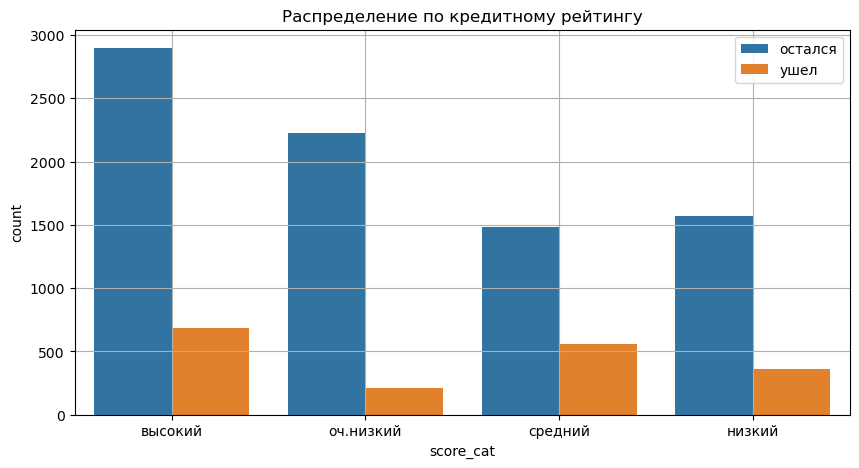

In [31]:
# выводим таблицу и график распределения клиентов по кредитному рейтингу
display(churn_tabel('score_cat'))

churn_chart('score_cat', 'Распределение по кредитному рейтингу')

Видим, что по абсолютным значениям чаще уходят клиенты с высоким кредитным рейтингом, но это происходит только потому, что данных об этих клиентах в целом больше. Если смотреть относительно, то чаще всего уходят клиенты с средним рейтингом (27%). Реже всего уходят клиенты с очень низкий рейтингом (9%).

#### по городу

,доля ушедих,кол-во клиентов
city,,
Ярославль,0.19,5905.00
Ростов,0.19,1431.00
Рыбинск,0.16,2663.00


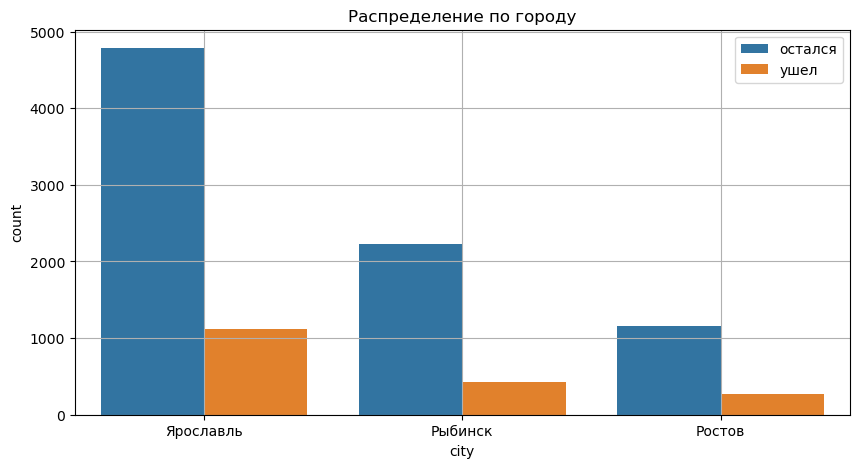

In [32]:
# выводим таблицу и график распределения клиентов по городу
display(churn_tabel('city'))

churn_chart('city', 'Распределение по городу')

По таблице и графику видно, что чаще всего уходят клиенты из городов Ярославль и Ростов (по 19%), но из-за большего числа клиентов из Ярославля абослютное значение уходящих здесь выше (видно по графику), хотя процент одинаковый. В Рыбинске же клиенты уходят в 16% случаев, что немного ниже.

#### по полу

,доля ушедих,кол-во клиентов
gender,,
М,0.24,5007.00
Ж,0.13,4992.00


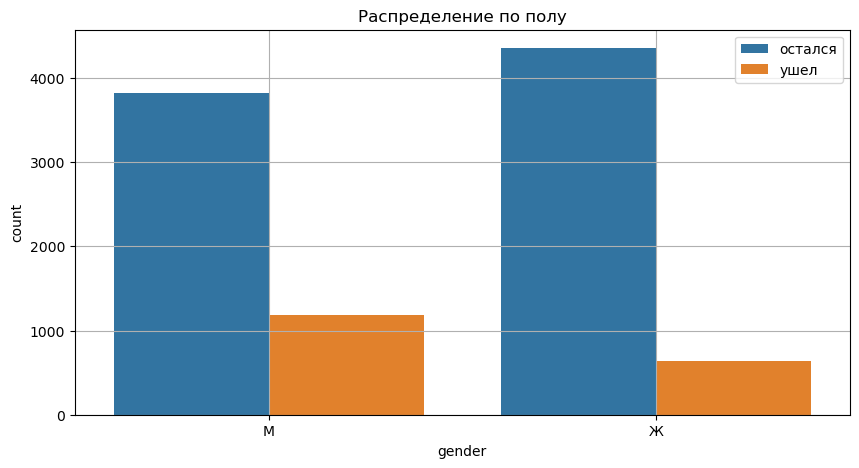

In [33]:
# выводим таблицу и график распределения клиентов по полу
display(churn_tabel('gender'))

churn_chart('gender', 'Распределение по полу')

Мужчины покидают банк чаще женщин в относительных и абсолютных показателях (24% и ~1200 человек против 13% и ~700 человек).

#### по возрасту

,доля ушедих,кол-во клиентов
age_cat,,
молодой,0.21,3267.00
взрослый,0.17,4916.00
пожилой,0.15,1816.00


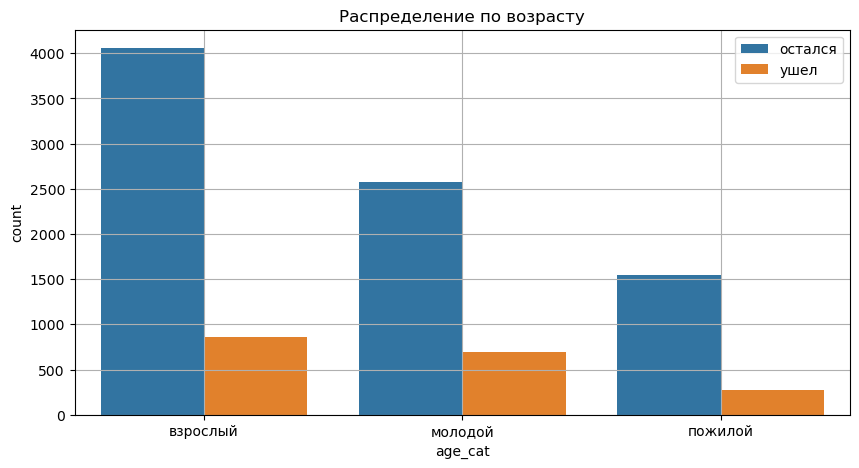

In [34]:
# выводим таблицу и график распределения клиентов по возрасту
display(churn_tabel('age_cat'))

churn_chart('age_cat', 'Распределение по возрасту')

В абсолютных значения отток больше из категории взрослых, но только потому, что эта группа сама по себе объемнее. Самый большой отток на самом деле из группы молодых - 21%. Самый же низкий у пожилых - 15%.

#### по оценке собвственности

,доля ушедих,кол-во клиентов
equity,,
9,0.54,13.00
7,0.46,80.00
6,0.36,161.00
8,0.35,17.00
5,0.30,1918.00
4,0.25,1850.00
3,0.21,1543.00
2,0.16,1052.00
1,0.12,774.00


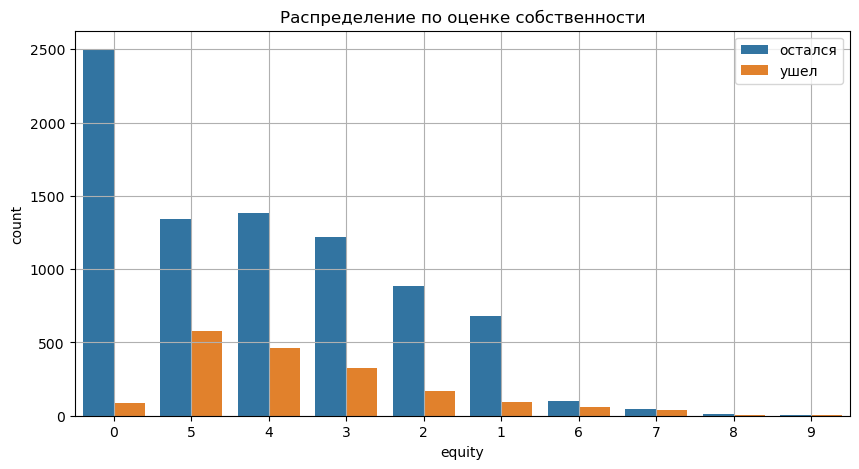

In [35]:
# выводим таблицу и график распределения клиентов по оценке собственности
display(churn_tabel('equity'))

churn_chart('equity', 'Распределение по оценке собственности')

Чаще всего уходят клиенты с оценкой собственности равной 9 (54%), далее идут 7 (46%) и замыкают тройку клиенты с оценкой собственности равной 6 (36%). Клиентов в этих категориях достаточно мало и о какой-то статистической корректности говорить сложно, по абсолютным значениям лидер - категория клиентов с оценкой 5 (около 550 человек), в этой категории тоже довольно высокий отток (30%) и достаточно много участников - здесь уже можно делать какие-то выводы. Самая надежная группа - 0, она самая массовая и в ней самый маленький отток (3%). 

##### по балансу на счете

,доля ушедих,кол-во клиентов
balance_cat,,
миллионный,0.38,1927.00
большой,0.22,1927.00
средний,0.18,1929.00
минимальный,0.16,1922.00


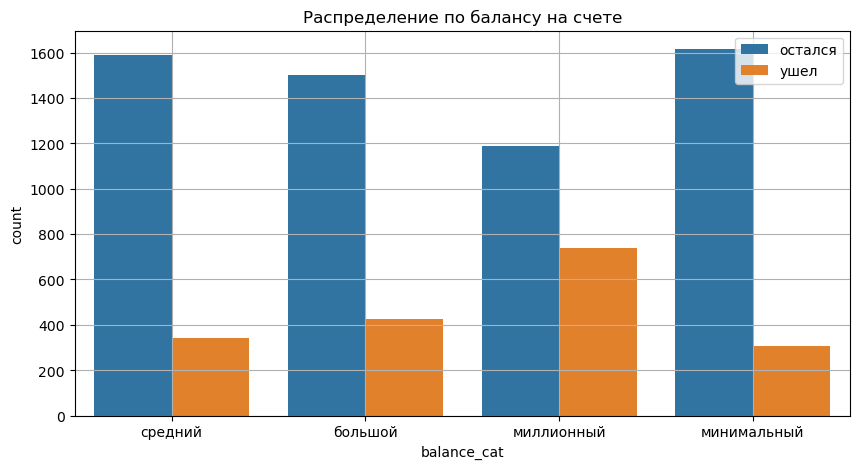

In [36]:
# выводим таблицу и график распределения клиентов по балансу на счете
display(churn_tabel('balance_cat'))

churn_chart('balance_cat', 'Распределение по балансу на счете')

Самый большой отток среди клиентов с балансом от около 1 миллиона и выше (38%), в абсолютных значениях около 800 человек. Минимальный отток у клиентов с минимальным счетом баланса (это те, у кого до 300 тысяч на счету) - 16%, в абсолютных значениях около 300 человек.

#### по количеству продуктов

,доля ушедих,кол-во клиентов
products,,
0,1.00,1.00
4,0.63,474.00
5,0.30,30.00
3,0.28,1046.00
2,0.19,5108.00
1,0.07,3340.00


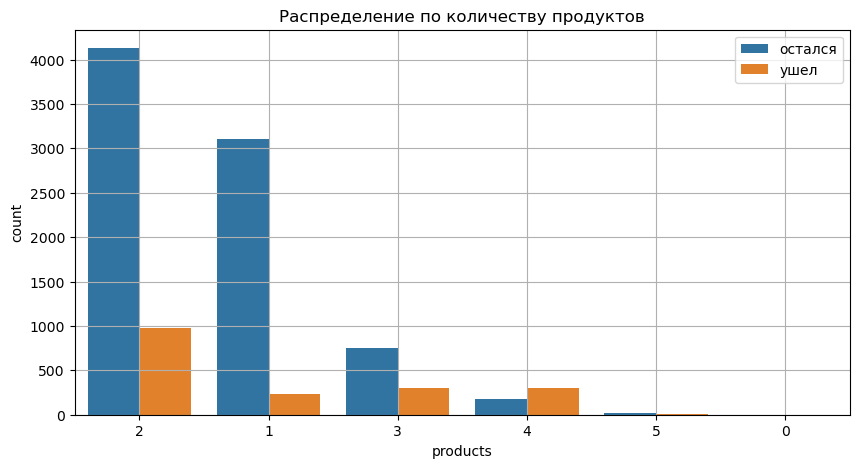

In [37]:
# выводим таблицу и график распределения клиентов по количеству продуктов
display(churn_tabel('products'))

churn_chart('products', 'Распределение по количеству продуктов')

Клиент с 0 продуктов интересная личность, кончено, но никакой значимости для нас не несет, поэтому внимания на него обращать не будем. Группа с 4 продуктами очень сильно выбивается, во-первых, оттуда ушло больше клиентов, чем осталось, а также там очень большой относительный отток (63%). Клиенты же с 1 продуктом уходят намного реже - в 7% случаев.

#### по наличию кредитной карты

,доля ушедих,кол-во клиентов
credit_card,,
0,0.26,3196.00
1,0.15,6803.00


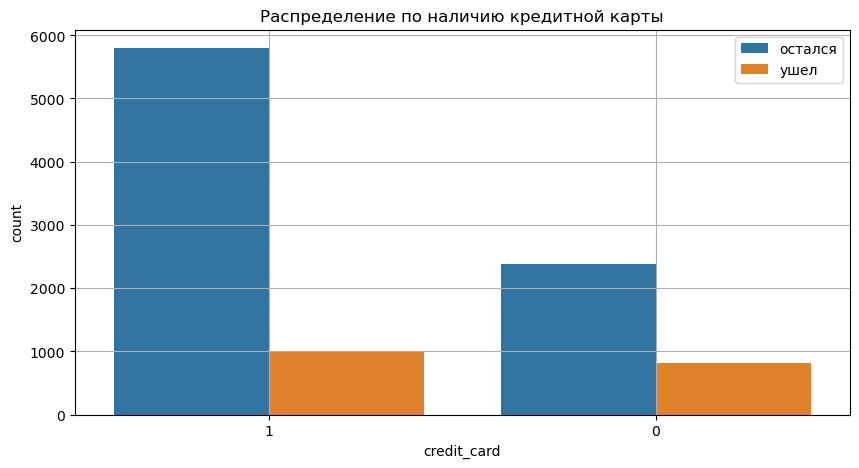

In [38]:
# выводим таблицу и график распределения клиентов по наличию кредитной карты
display(churn_tabel('credit_card'))

churn_chart('credit_card', 'Распределение по наличию кредитной карты')

Клиенты с кредитной картой уходят чаще - в 26% случаев. Несмотря на то, что люди без кредитной карты по графику уходят чаще, процент уходящих там ниже - 15%.

#### по наличию активности

,доля ушедих,кол-во клиентов
last_activity,,
1,0.24,5235.00
0,0.11,4764.00


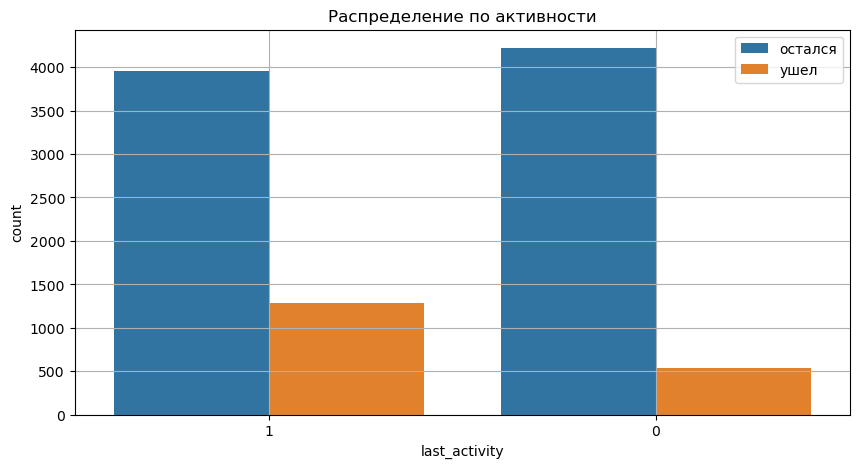

In [39]:
# выводим таблицу и график распределения клиентов по наличию активности
display(churn_tabel('last_activity'))

churn_chart('last_activity', 'Распределение по активности')

Тут все достаточно логично - неактивные клиенты уходят чаще активных (24%). Но стоит обратить внимание на общее количество неактивных клиентов - их больше, чем активных, но это тема уже другого исследования.

#### по зарплате

,доля ушедих,кол-во клиентов
est_salary_cat,,
выше среднего,0.20,2515.00
средняя+,0.19,2478.00
значительно выше среднего,0.19,2521.00
средняя,0.15,2485.00


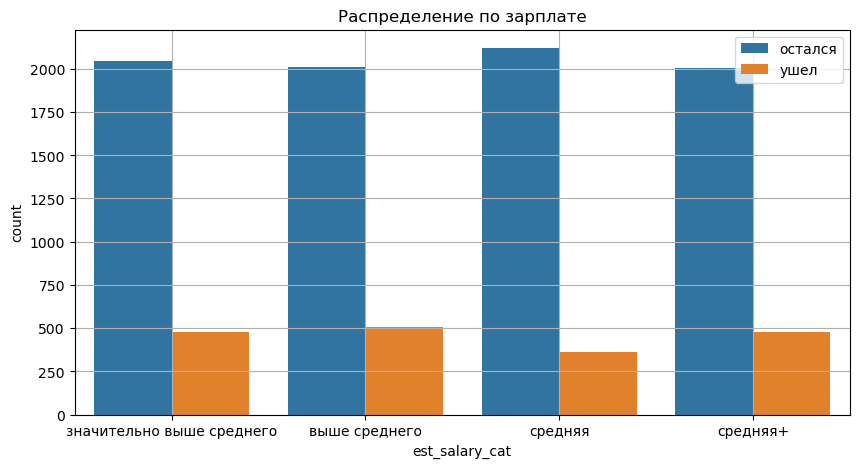

In [40]:
# выводим таблицу и график распределения клиентов по зарплате
display(churn_tabel('est_salary_cat'))

churn_chart('est_salary_cat', 'Распределение по зарплате')

В данном случае группы по размеру и оттоку примерно одинаковые, немного выделяется группа с заработком выше среднего (заработок от 119 тысяч до 174 тысяч) - уходят 20% клиентов. Самая лояльная группа - это клиенты с средним заработком (до 75.000), уходят только 15%.

Мы выявили самые отточные категории клиентов, давайте теперь выделим самые отточные сегменты, посмотрим сколько в них клиентов и какой процент оттока. При расчетах мы будем основываться на графиках и таблицах, рассчитаных выше - мы возьмем самые отточные категории и объеденим их в несколько сегментов.

### выделение отточных сегментов и их анализ:

#### функция для расчета сегментов

In [41]:
# функция, которая строит таблицу с информацией о кол-ве клентов в сегменте и доле ушедших в этом сегменте
def segment_tabel(column_1, column_cat_1, column_2, column_cat_2):
    
    #print('Сегментация по', column_1, 'и', column_2, 'в категориях', 
          #'"', column_cat_1, '"', 'и', '"', column_cat_2, '"', 'соответственно:')
    
    tabel = (data.loc[(data[column_1] == column_cat_1) & (data[column_2] == column_cat_2)]
             .agg({'user_id':'count', 'churn':'mean'}).reset_index()
             .rename(mapper = {0 : 'кол-во клиентов', 1 : 'доля ушедих'}, axis=0)
             .T
             .drop('index', axis=0)
            )
    
    tabel = (tabel.assign(C = tabel['доля ушедих'] * tabel['кол-во клиентов'])
             .rename(mapper = {'C' : 'кол-во ушедших'}, axis=1)
             .style.format('{:.2f}')
            )
   
    return tabel

#### 1 сегмент: мужчины с миллионым балансом

In [42]:
segment_tabel('balance_cat', 'миллионный', 'gender', 'М')

,кол-во клиентов,доля ушедих,кол-во ушедших
0,1004.00,0.49,490.00


Почти половина клиентов мужского пола с миллиоными балансами покидает банк.

#### 2 сегмент: неактивные клиенты с средним кредитным рейтингом

In [43]:
segment_tabel('last_activity', 1, 'score_cat', 'средний')

,кол-во клиентов,доля ушедих,кол-во ушедших
0,1002.00,0.44,440.00


Достаточно отточный сегмент: 44% неактивных клиентов с средним кредитным рейтингом уходят из банка.

#### 3 сегмент: клиенты, живущие в Ярославле с миллиоными балансами

In [44]:
segment_tabel('balance_cat', 'миллионный', 'city', 'Ярославль')

,кол-во клиентов,доля ушедих,кол-во ушедших
0,1189.00,0.41,492.00


Сегмент достаточно большой по размеру и с большим оттоком (41%).

#### 4 сегмент: клиены с зарплатой выше среднего и миллионым балансом

In [45]:
segment_tabel('est_salary_cat', 'выше среднего', 'balance_cat', 'миллионный')

,кол-во клиентов,доля ушедих,кол-во ушедших
0,560.00,0.41,229.00


41% покинул этого сегмента покинул банк - это 229 человек.

#### 5 сегмент: клиены мужского пола с оценкой имущества равной 5

In [46]:
segment_tabel('equity', 5, 'gender', 'М')

,кол-во клиентов,доля ушедих,кол-во ушедших
0,974.00,0.40,389.00


974 клиента, из которых ушло 389 (40%).

В данном пункте мы выделили 5 самых отточных сегментов (с оттоком более 40% и численостью более 500 человек). На эти сегменты стоит обратить внимание и провести определенную работу. Рекомендации будут ниже.

**Вывод к главе:**

Мы провели исследовательский анализ данных. Категоризовали данные клиентов и визуализировали их с учетом оттока. Выявили 5 самых отточных сегментов. По итогам анализа можем выделить портрет клиентов склонных к оттоку и портрет, наоборот, самых лояльных клиентов.


**ПОРТРЕТ КЛИЕНТА СКЛОННОГО К ОТТОКУ**

Молодой мужчина, не являющийся активным пользователем, со средним кредитным рейтингом, живущий в Ярославле или Ростове, с оценкой собственности от 5 до 9, с миллионым балансом на счете и 4 продуктами, с кредитной картой и зарплатой выше среднего.


**ПОРТРЕТ САМОГО ЛОЯЛЬНОГО КЛИЕНТА**

Пожилая женщина, являющаяся активным пользователем, со низким кредитным рейтингом, живущая в Рыбинске, с оценкой собственности равной 0, с минимальным или средним балансом на счете и 1 продуктом, без кредитной карты и средней зарплатой.


**САМЫЕ ОТТОЧНЫЕ СЕГМЕНТЫ**

1. мужчины с миллионым балансом (отток - 49%);
2. неактивные клиенты с средним кредитным рейтингом (отток - 44%);
3. клиенты, живущие в Ярославле с миллиоными балансами (отток - 41%);
4. клиены с зарплатой выше среднего и миллионым балансом (отток - 41%);
5. клиены мужского пола с оценкой имущества равной 5 (отток - 40%).

## Проверка гипотез

Будем проверять гипотезы о схожести распределения выборок, применяя U-критерий Манна-Уитни.

Выберем уровень статистической значимости равный: 0.05. Это значит, что мы допускаем 5% вероятность ошибки.

### проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались:


H0: Статистичекски значимой разницы в доходах клиентов, которые ушли и которые остались нет.

H1: Есть статистичекски значимая разница в доходах клиентов, которые ушли и которые остались.

In [47]:
# критический уровень статистической значимости
alpha = 0.05  

# тест с применением U-критерия Манна-Уитни
results = stats.mannwhitneyu(data.query('churn == 0')['est_salary'], 
                             data.query('churn == 1')['est_salary'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть статестически значимая разница в доходах ушедших и оставшихся клиентов')
else:
    print('Не получилось отвергнуть Н0: статестически значимой разницы в доходах ушедших и оставшихся клиентов нет') 

p-значение: 0.0002499111605569152
Отвергаем нулевую гипотезу: есть статестически значимая разница в доходах ушедших и оставшихся клиентов


Результаты теста говорят нам о том, что есть статестически значимая разница в доходах ушедших и оставшихся клиентов. p-значение сильно меньше значения alpha, вероятность ошибки минимальная.

### проверим гипотезу различия кредитного рейтинга между теми клиентами, которые ушли и теми, которые остались:

H0: Статистичекски значимой разницы в кредитном рейтинге клиентов, которые ушли и которые остались нет.

H1: Есть статистичекски значимая разница в кредитном рейтинге клиентов, которые ушли и которые остались.

In [48]:
# тест с применением U-критерия Манна-Уитни
results = stats.mannwhitneyu(data.query('churn == 0')['score'], 
                             data.query('churn == 1')['score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть статестически значимая разница в кредитном рейтинге ушедших и оставшихся клиентов')
else:
    print('Не получилось отвергнуть Н0: статестически значимой разницы в кредитном рейтинге ушедших и оставшихся клиентов нет') 

p-значение: 4.158883884448029e-22
Отвергаем нулевую гипотезу: есть статестически значимая разница в кредитном рейтинге ушедших и оставшихся клиентов


По результату теста мы видим, что p-значение крайне маленькое. Это значит, что статестическая разница между группами есть и достаточно большая, а это значит, что кредитные рейтинги ушедших и оставшихся клиентов имеют статистичекски значимую разницу.

## Вывод

**было сдеалано:**

1. предобработка данных;


2. исследовательский анализ данных:
    * были выделены категории клиентов;
    * визуализированы распределения клиентов по категорям с разделением на ушедших и оставшихся;
    * не было найдено каких-либо сильных взаимосвязей в данных;
    * были составлены портреты уходящего и лояльного клиента;
    
    
3. проверены гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались и о различии кредитного рейтинга между теми клиентами, которые ушли и теми, которые остались.

**портрет пользователя, склонного уходить:**

Молодой мужчина, не являющийся активным пользователем, со средним кредитным рейтингом, живущий в Ярославле или Ростове, с оценкой собственности от 5 до 9, с миллионым балансом на счете и 4 продуктами, с кредитной картой и зарплатой выше среднего.

**самые отточные сегменты:**

1. мужчины с миллионым балансом (отток - 49%);
2. неактивные клиенты с средним кредитным рейтингом (отток - 44%);
3. клиенты, живущие в Ярославле с миллиоными балансами (отток - 41%);
4. клиены с зарплатой выше среднего и миллионым балансом (отток - 41%);
5. клиены мужского пола с оценкой имущества равной 5 (отток - 40%).

**гипотезы:**

1. гипотеза равенства дохода между теми клиентами, которые ушли и теми, которые остались была опровергнута - есть статистически значимая разница;


2. гипотеза равенства кредитного рейтинга между теми клиентами, которые ушли и теми, которые остались, была опровергнута - есть статистически значимая разница.

## Рекомендации

Глубже проанализировать ситуацию с активностю клиентов, так как очень много клиентов попросту неактивны. Возможно стоит рассмотреть вариант с внедрением новых функций, чтобы повысить активность клиентов (например возможность новых переводов или встроенный магазин со скидками от партнеров).


Изменить подход к привлечению новых клиентов, а именно:
    
   1. увеличить количество рекламных компаний в городе Рыбинске;
   2. улучшить систему проверки кредитного рейтинга и обратить внимание на людей с низким или очень высоким кредитным рейтингом;

Предложить новые условия держателям больших балансов, возможно другие банки предлагают более выгодные условия по вкладам и кредитам, что непосредственно влияет на отток.


Проверить и выявить проблему 4 продуктов - очень большой отток клиентов с 4 продуктами. Возможно это ошибка системы, возможно недоработка условий, в следствие чего клиенты мотивируются на отток.


Пересмотреть политику выдачи кредитных карт (условия и ограничения).

Продолжить политику привлечения пенсионеров - они показывают хорошее удержание и достаточно редко уходят.

Удержание людей с 1 продуктом без кредитной карты (скорее всего вклад) хорошее, поэтому стоит продолжить работу в данном направлении.